# Verify AlphaFold accuracy for 100 targets
Subset: target_subset_how_eq_random_num_100_seed_0

Set the target numbers of `is_similar_AF2` and not `is_similar_AF2` equal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (5, 3)

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'accuracy'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()

In [3]:
label_path = score_dir / 'label.csv'
label_df = pd.read_csv(label_path, index_col=0)
label_df

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,Seed,Recycle,Ensemble,Target,Num_diff,Num_missing,Length
0,model_1_ptm_seed_0_rec_10_ens_1,0.981,0.965,0.857,0.899,0.894,0.936,0.892,0.084,model_1_ptm,0,10,1,7DW4_A,0,15,235
1,model_1_ptm_seed_0_rec_10_ens_8,0.981,0.966,0.859,0.900,0.895,0.937,0.893,0.054,model_1_ptm,0,10,8,7DW4_A,0,15,235
2,model_1_ptm_seed_0_rec_1_ens_1,0.980,0.965,0.852,0.901,0.896,0.928,0.887,26.445,model_1_ptm,0,1,1,7DW4_A,0,15,235
3,model_1_ptm_seed_0_rec_1_ens_8,0.980,0.964,0.856,0.899,0.895,0.928,0.887,26.413,model_1_ptm,0,1,8,7DW4_A,0,15,235
4,model_1_ptm_seed_0_rec_2_ens_1,0.980,0.961,0.852,0.900,0.895,0.933,0.890,0.391,model_1_ptm,0,2,1,7DW4_A,0,15,235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36995,model_5_seed_1_rec_5_ens_1,0.966,0.900,0.735,0.835,0.823,0.784,NaN,0.917,model_5,1,5,1,7BUJ_A,0,86,447
36996,model_5_seed_1_rec_6_ens_1,0.965,0.902,0.737,0.835,0.824,0.784,NaN,1.534,model_5,1,6,1,7BUJ_A,0,86,447
36997,model_5_seed_1_rec_7_ens_1,0.965,0.901,0.735,0.835,0.824,0.785,NaN,1.668,model_5,1,7,1,7BUJ_A,0,86,447
36998,model_5_seed_1_rec_8_ens_1,0.965,0.897,0.732,0.835,0.823,0.785,NaN,1.460,model_5,1,8,1,7BUJ_A,0,86,447


In [4]:
target_df = pd.read_csv(target_list, index_col=0)
target_df

,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
1,6DHP_o,2.040,2018-11-21T00:00:00Z,>6dhp_o mol:protein length:244 Photosystem II...,QTLTYDDIVGTGLANKCPTLDDTARGAYPIDSSQTYRIARLCLQPT...,244,91,34,True
2,6UVQ_A,1.840,2020-11-25T00:00:00Z,>6uvq_A mol:protein length:268 D-glucose O-me...,MTDISQMYDQLSDPFAGLGAGNIHLGYFDGPDDAATLAEAADRLTD...,268,8,3,True
3,6BNZ_A,1.450,2018-11-21T00:00:00Z,>6bnz_A mol:protein length:296 Lactoylglutath...,GSHMASMATGSEASKAAEAVVDWHKHDSKRMLHAVYRVGDLDRTIK...,296,4,3,True
4,5OJL_A,1.560,2018-05-30T00:00:00Z,>5ojl_A mol:protein length:298 Imine reductase,MATTTTTTKLTIFGLGAMGTAMATQFLKQGHTPTVWNRTAAKANPL...,298,61,29,True
...,...,...,...,...,...,...,...,...,...
95,6JY5_D,2.150,2019-06-26T00:00:00Z,>6jy5_D mol:protein length:85 Unidentified ca...,MEVMRVRSDLIATRRIPGLKNISLRVMEDATGKVSVACDPIGVPEG...,85,5,5,False
96,6XHZ_A,1.250,2021-01-20T00:00:00Z,>6xhz_A mol:protein length:216 N4: hypothetic...,MAPTAVRGGNVLFSASGRCTVGFNATKGGTYYAIMEGRCVGGARDW...,216,1,1,False
97,6R5W_A,1.700,2019-10-30T00:00:00Z,>6r5w_A mol:protein length:173 Gp15 protein,NPAQFAQKTVLDEHVNDADIHVTATDKTNWNAKETVEGAQAKADKA...,173,3,3,False
98,6XN2_A,1.652,2020-12-02T00:00:00Z,>6xn2_A mol:protein length:364 Xylosidase,MGSSHHHHHHSSGLVPRGSHMSDELQAASLQALARTAISAPLVTHL...,364,6,6,False


In [5]:
target_df['is_similar_AF2'].value_counts()

False    50
True     50
Name: is_similar_AF2, dtype: int64

In [6]:
df = pd.merge(label_df, target_df, left_on='Target', right_on='id', how='left')
df

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,Length,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,model_1_ptm_seed_0_rec_10_ens_1,0.981,0.965,0.857,0.899,0.894,0.936,0.892,0.084,model_1_ptm,...,235,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
1,model_1_ptm_seed_0_rec_10_ens_8,0.981,0.966,0.859,0.900,0.895,0.937,0.893,0.054,model_1_ptm,...,235,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
2,model_1_ptm_seed_0_rec_1_ens_1,0.980,0.965,0.852,0.901,0.896,0.928,0.887,26.445,model_1_ptm,...,235,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
3,model_1_ptm_seed_0_rec_1_ens_8,0.980,0.964,0.856,0.899,0.895,0.928,0.887,26.413,model_1_ptm,...,235,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
4,model_1_ptm_seed_0_rec_2_ens_1,0.980,0.961,0.852,0.900,0.895,0.933,0.890,0.391,model_1_ptm,...,235,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36995,model_5_seed_1_rec_5_ens_1,0.966,0.900,0.735,0.835,0.823,0.784,NaN,0.917,model_5,...,447,7BUJ_A,2.130,2020-09-02T00:00:00Z,>7buj_A mol:protein length:447 Cyclic GMP-AMP...,PRVHPARATELTKDAQPSAMDAAGATARPAVRVPQQQAILDPELPA...,447,2,2,False
36996,model_5_seed_1_rec_6_ens_1,0.965,0.902,0.737,0.835,0.824,0.784,NaN,1.534,model_5,...,447,7BUJ_A,2.130,2020-09-02T00:00:00Z,>7buj_A mol:protein length:447 Cyclic GMP-AMP...,PRVHPARATELTKDAQPSAMDAAGATARPAVRVPQQQAILDPELPA...,447,2,2,False
36997,model_5_seed_1_rec_7_ens_1,0.965,0.901,0.735,0.835,0.824,0.785,NaN,1.668,model_5,...,447,7BUJ_A,2.130,2020-09-02T00:00:00Z,>7buj_A mol:protein length:447 Cyclic GMP-AMP...,PRVHPARATELTKDAQPSAMDAAGATARPAVRVPQQQAILDPELPA...,447,2,2,False
36998,model_5_seed_1_rec_8_ens_1,0.965,0.897,0.732,0.835,0.823,0.785,NaN,1.460,model_5,...,447,7BUJ_A,2.130,2020-09-02T00:00:00Z,>7buj_A mol:protein length:447 Cyclic GMP-AMP...,PRVHPARATELTKDAQPSAMDAAGATARPAVRVPQQQAILDPELPA...,447,2,2,False


In [7]:
# Check target number
targets = df['Target'].unique().tolist()
print(len(targets))

100


In [8]:
# Check target number that does not have LDDT score
df.groupby('Target').head(1)['Global_LDDT'].isnull().sum()

3

## Model Quality

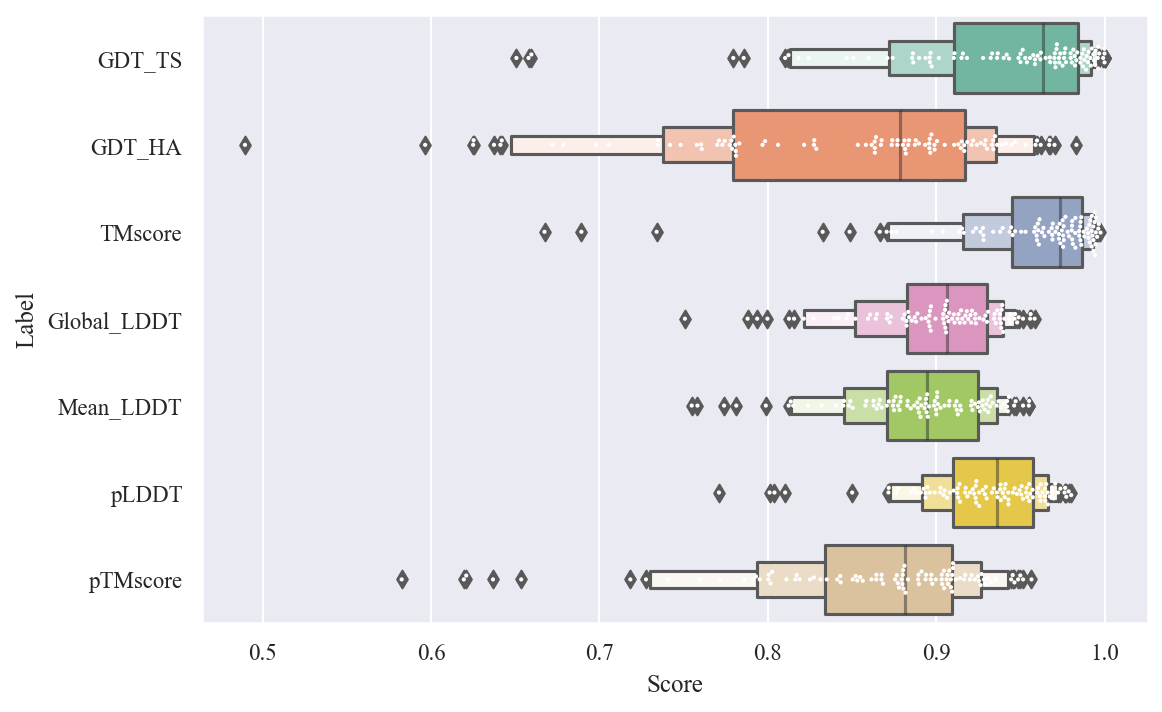

In [9]:
# max value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=2)
plt.tight_layout()
plt.savefig(fig_dir / 'max_value_each_labels.png')

### Verify whether the quality of the predicted structure changes between targets that have similar sequences in the AlphaFold training data and targets that do not

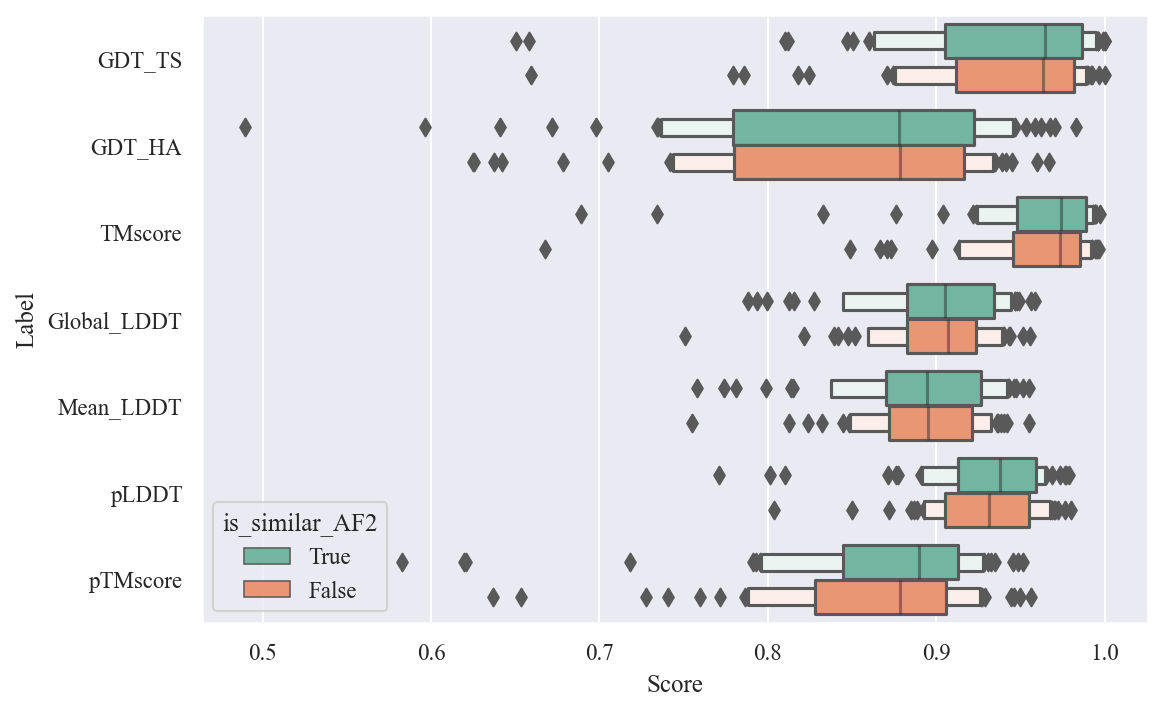

In [10]:
# max value for each label
# Targets whose similar sequence is included in AF2 training dataset or not
label_max_datas = []
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2', hue='is_similar_AF2', hue_order=[True, False])
plt.tight_layout()
plt.savefig(fig_dir / 'max_value_each_labels_similar_training.png')

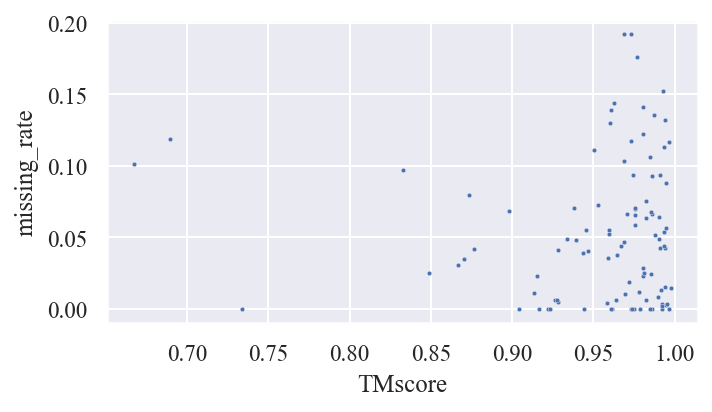

In [11]:
# Relationship between TMscore and ratio of missing residues
max_tmscore_df = df.groupby('Target').max('TMscore')
max_tmscore_df['missing_rate'] = max_tmscore_df['Num_missing'] / max_tmscore_df['Length']
sns.scatterplot(data=max_tmscore_df, x='TMscore', y='missing_rate', s=5)
plt.tight_layout()

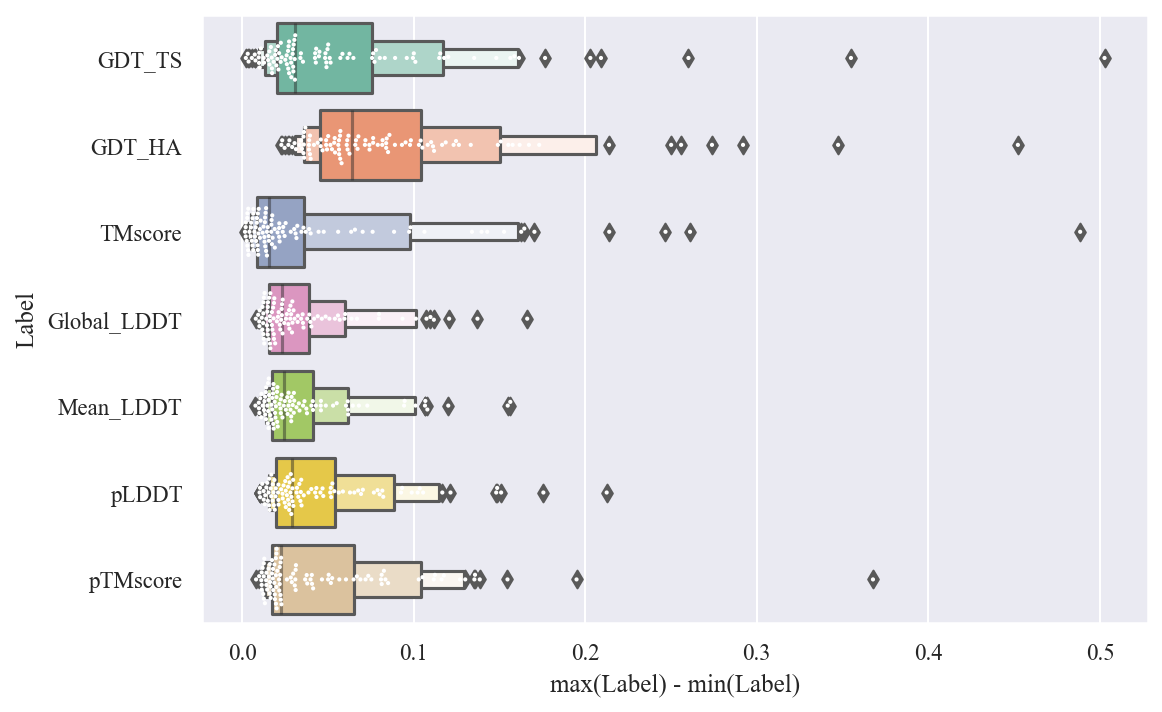

In [12]:
# max value - min value for each label
label_max_datas = []
for label in labels:
    value=df.groupby('Target').max(label)[label] - df.groupby('Target').min(label)[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=2)
plt.xlabel(f'max(Label) - min(Label)')
plt.tight_layout()
plt.savefig(fig_dir / 'max_minus_min_each_labels.png')

In [13]:
# Count target number whose value difference between max and min is larger than threshold
label = 'GDT_TS'
diff_value = df.groupby('Target').max(label)[label] - df.groupby('Target').min(label)[label]
len(diff_value[diff_value > 0.05])

34

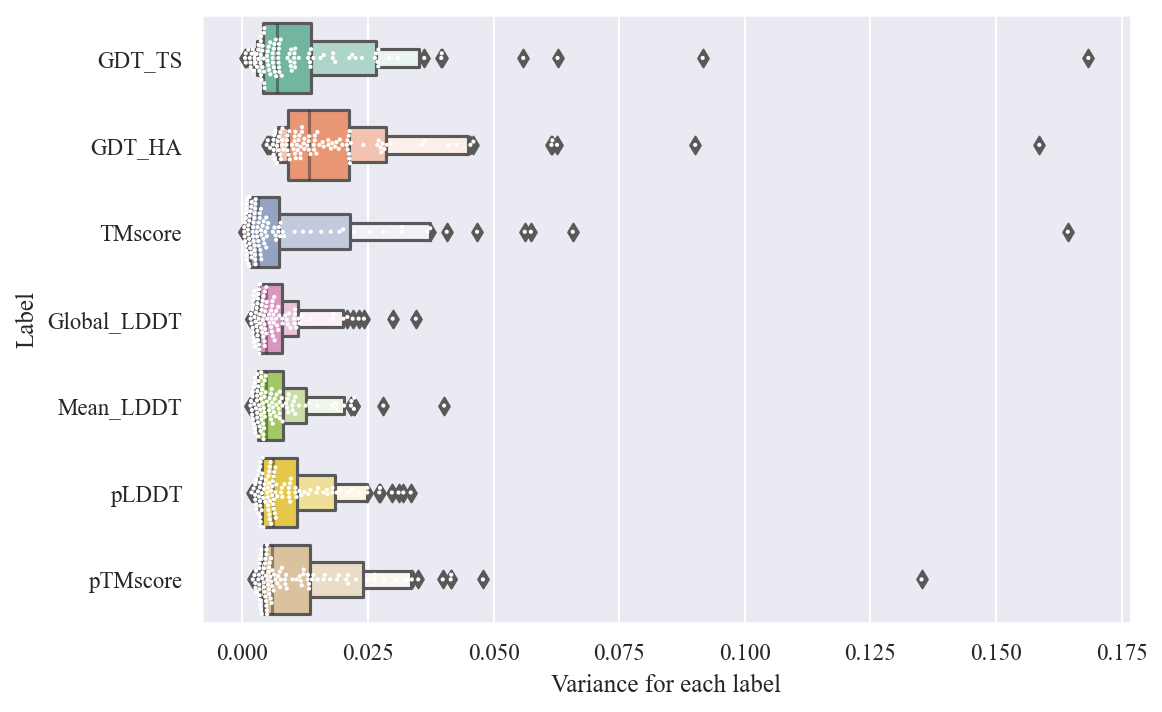

In [14]:
# Standard deviation for each label
label_max_datas = []
for label in labels:
    value=df.groupby('Target').std()[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=2)
plt.xlabel(f'Variance for each label')
plt.tight_layout()
plt.savefig(fig_dir / 'std_each_labels.png')

## Verify model accuracy difference between with and without ensemble

In [15]:
df['Ensemble'] = [True if e == 8 else False for e in df['Ensemble']]
en_df = df.query('Ensemble == True')
no_en_df = df.query('Ensemble == False')
en_merge_df = pd.merge(en_df, no_en_df, on=['ModelName', 'Seed', 'Recycle', 'Target'], suffixes=('_en', '_no_en'))

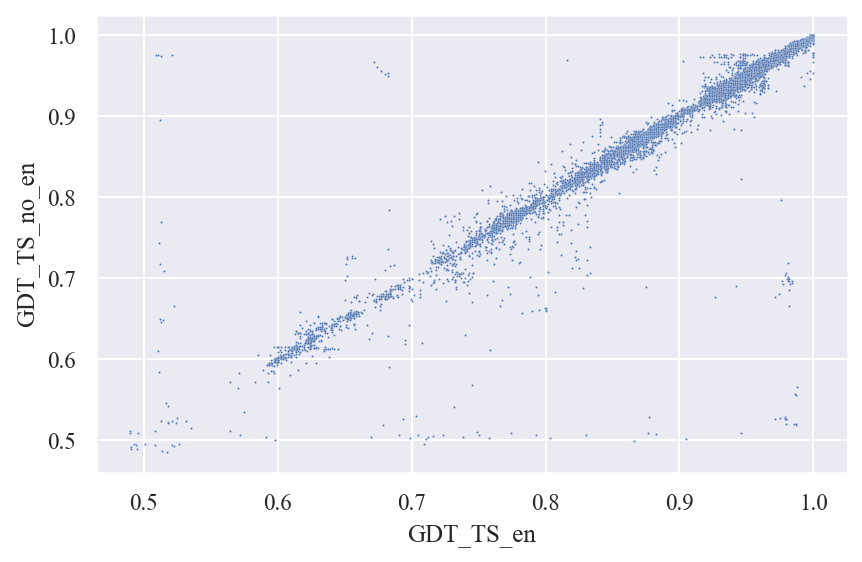

In [16]:
# Scatterplot of GDT_TS of models with and without ensemble
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
sns.scatterplot(data=en_merge_df, x=f'{label}_en', y=f'{label}_no_en', s=1)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{label}_en_or_no_en.png')

## Verify model accuracy difference between different seeds

In [17]:
seed_0_df = df.query('Seed == 0')
seed_1_df = df.query('Seed == 1')
seed_df = pd.merge(seed_0_df, seed_1_df, on=['ModelName', 'Ensemble', 'Recycle', 'Target'], suffixes=('_seed_0', '_seed_1'))

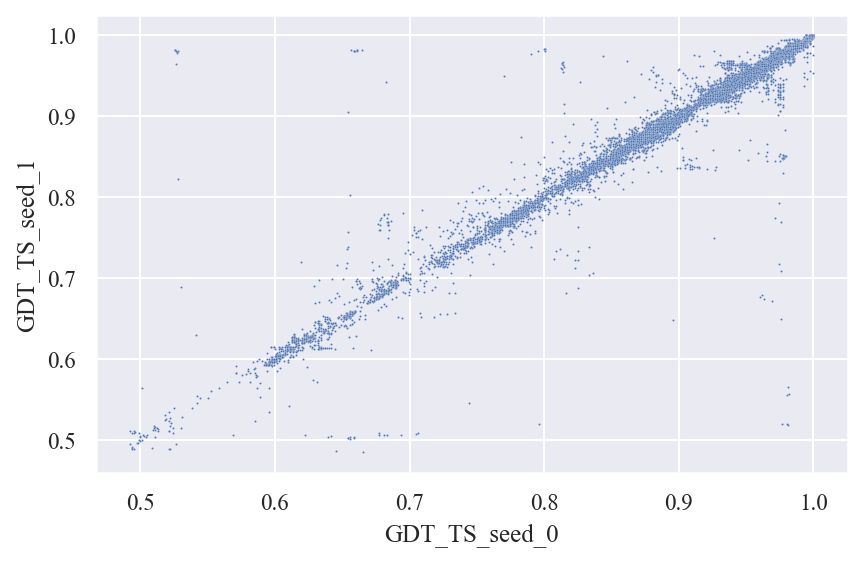

In [18]:
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
sns.scatterplot(data=seed_df, x=f'{label}_seed_0', y=f'{label}_seed_1', s=1)
# sns.scatterplot(data=seed_df, x=f'{label}_seed_0', y=f'{label}_seed_1', hue='Target')
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{label}_seed.png')

## Verify pLDDT and pTM

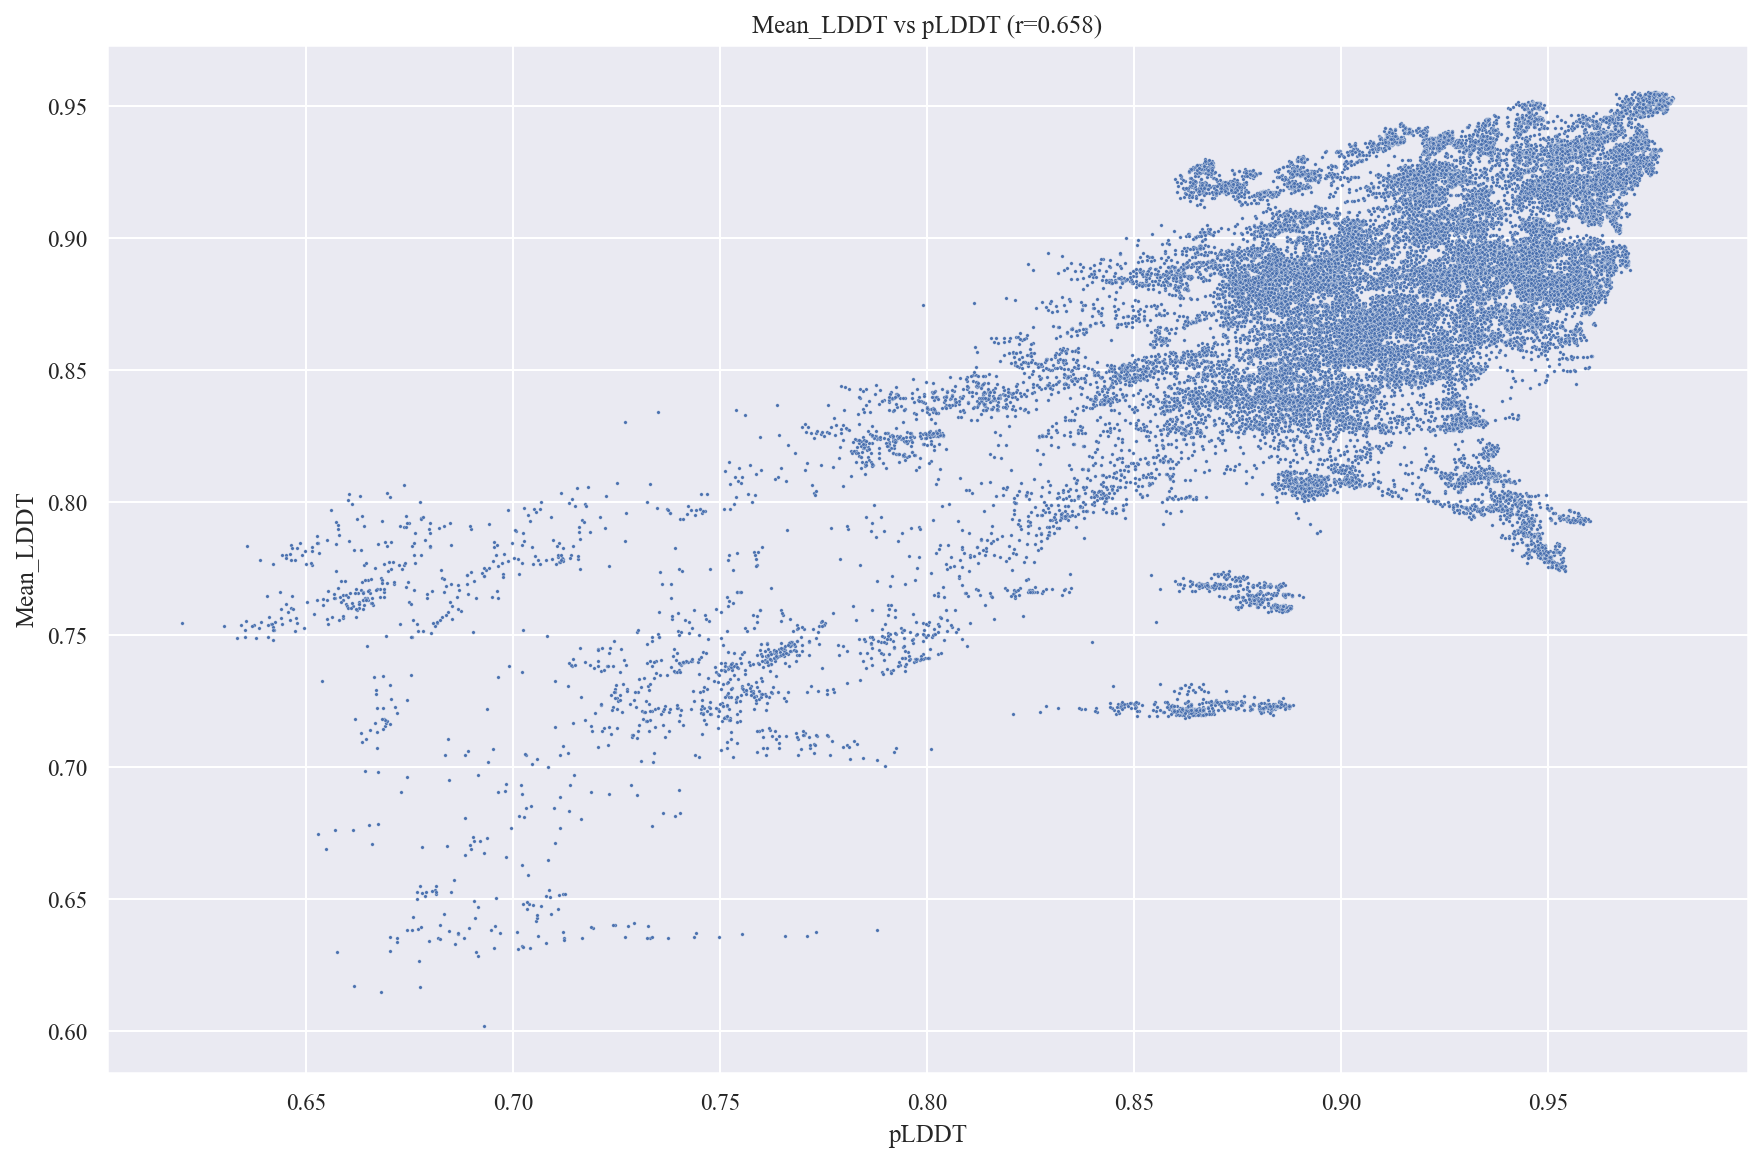

In [19]:
# Mean pLDDT vs Mean LDDT
label = 'Mean_LDDT'
score = 'pLDDT'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.title(f'{label} vs {score} (r={cc:.3f})')
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')


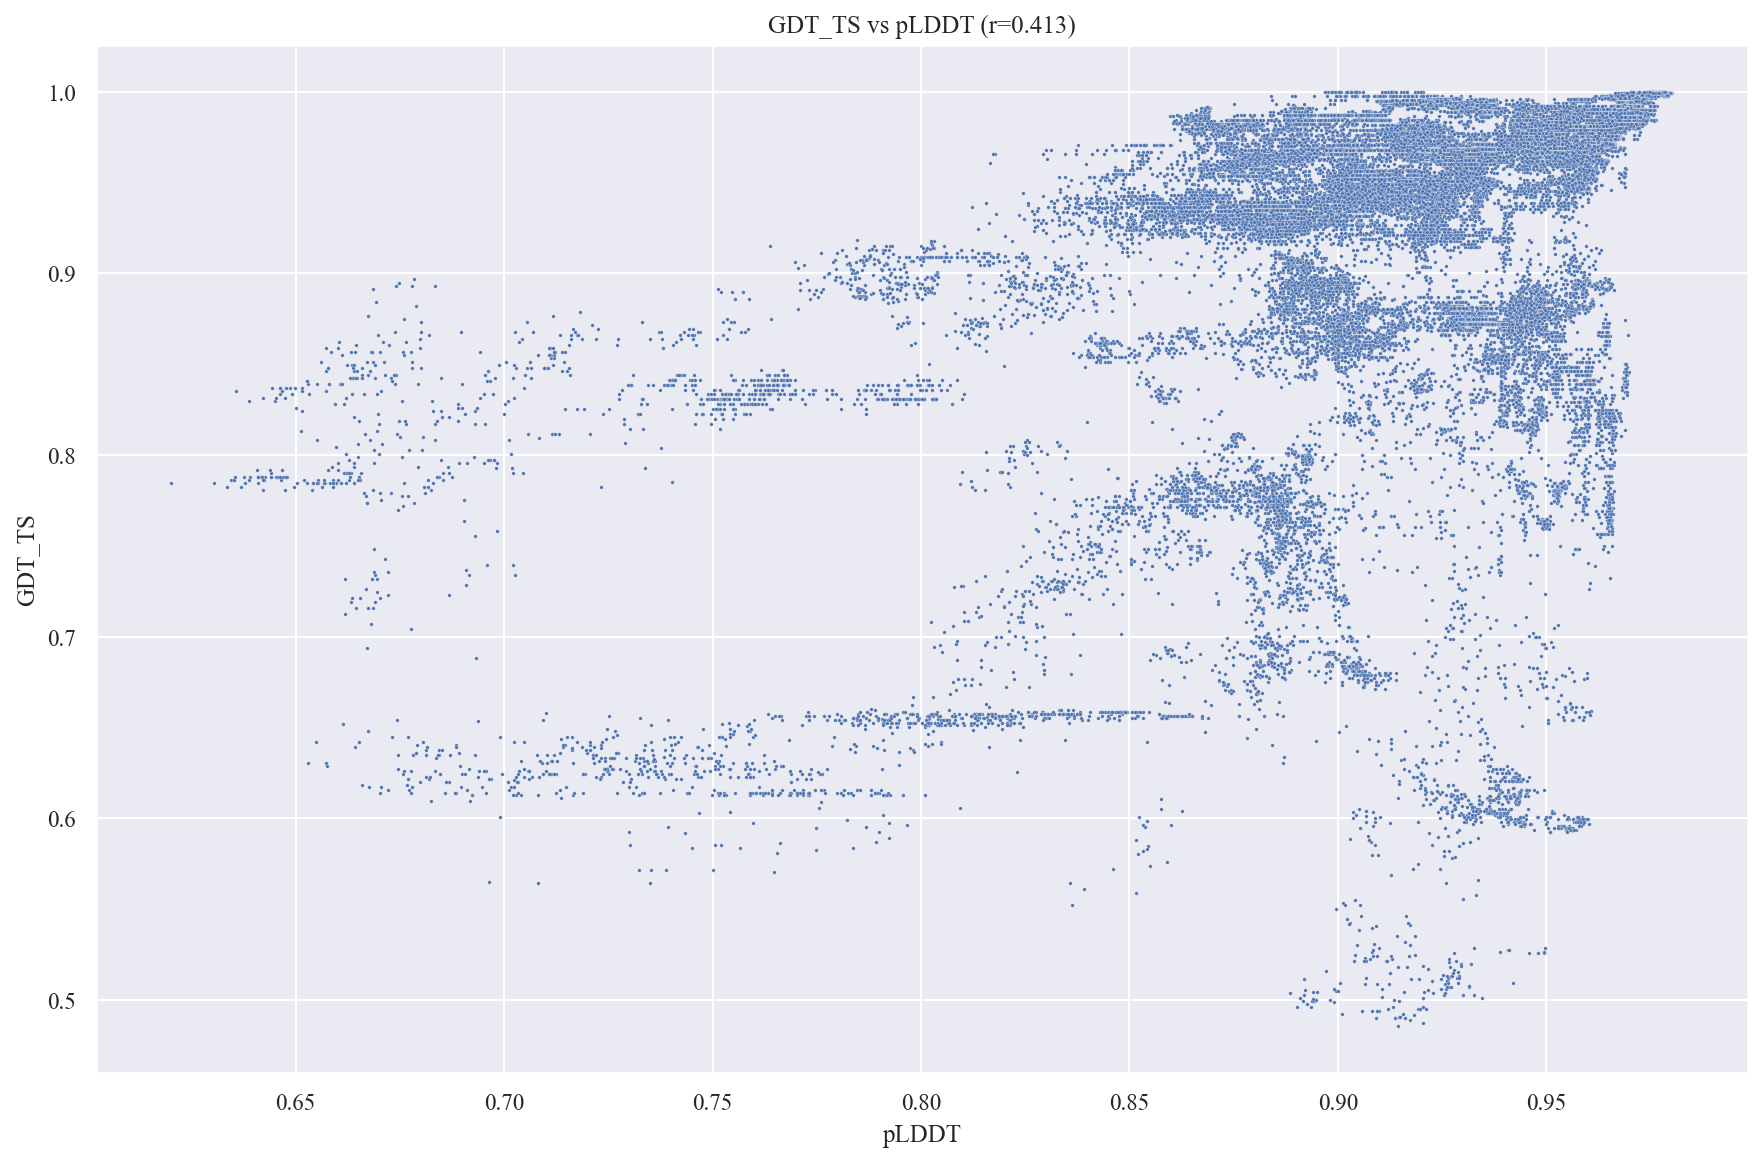

In [20]:
# Mean pLDDT vs GDT_TS
label = 'GDT_TS'
score = 'pLDDT'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.title(f'{label} vs {score} (r={cc:.3f})')
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')


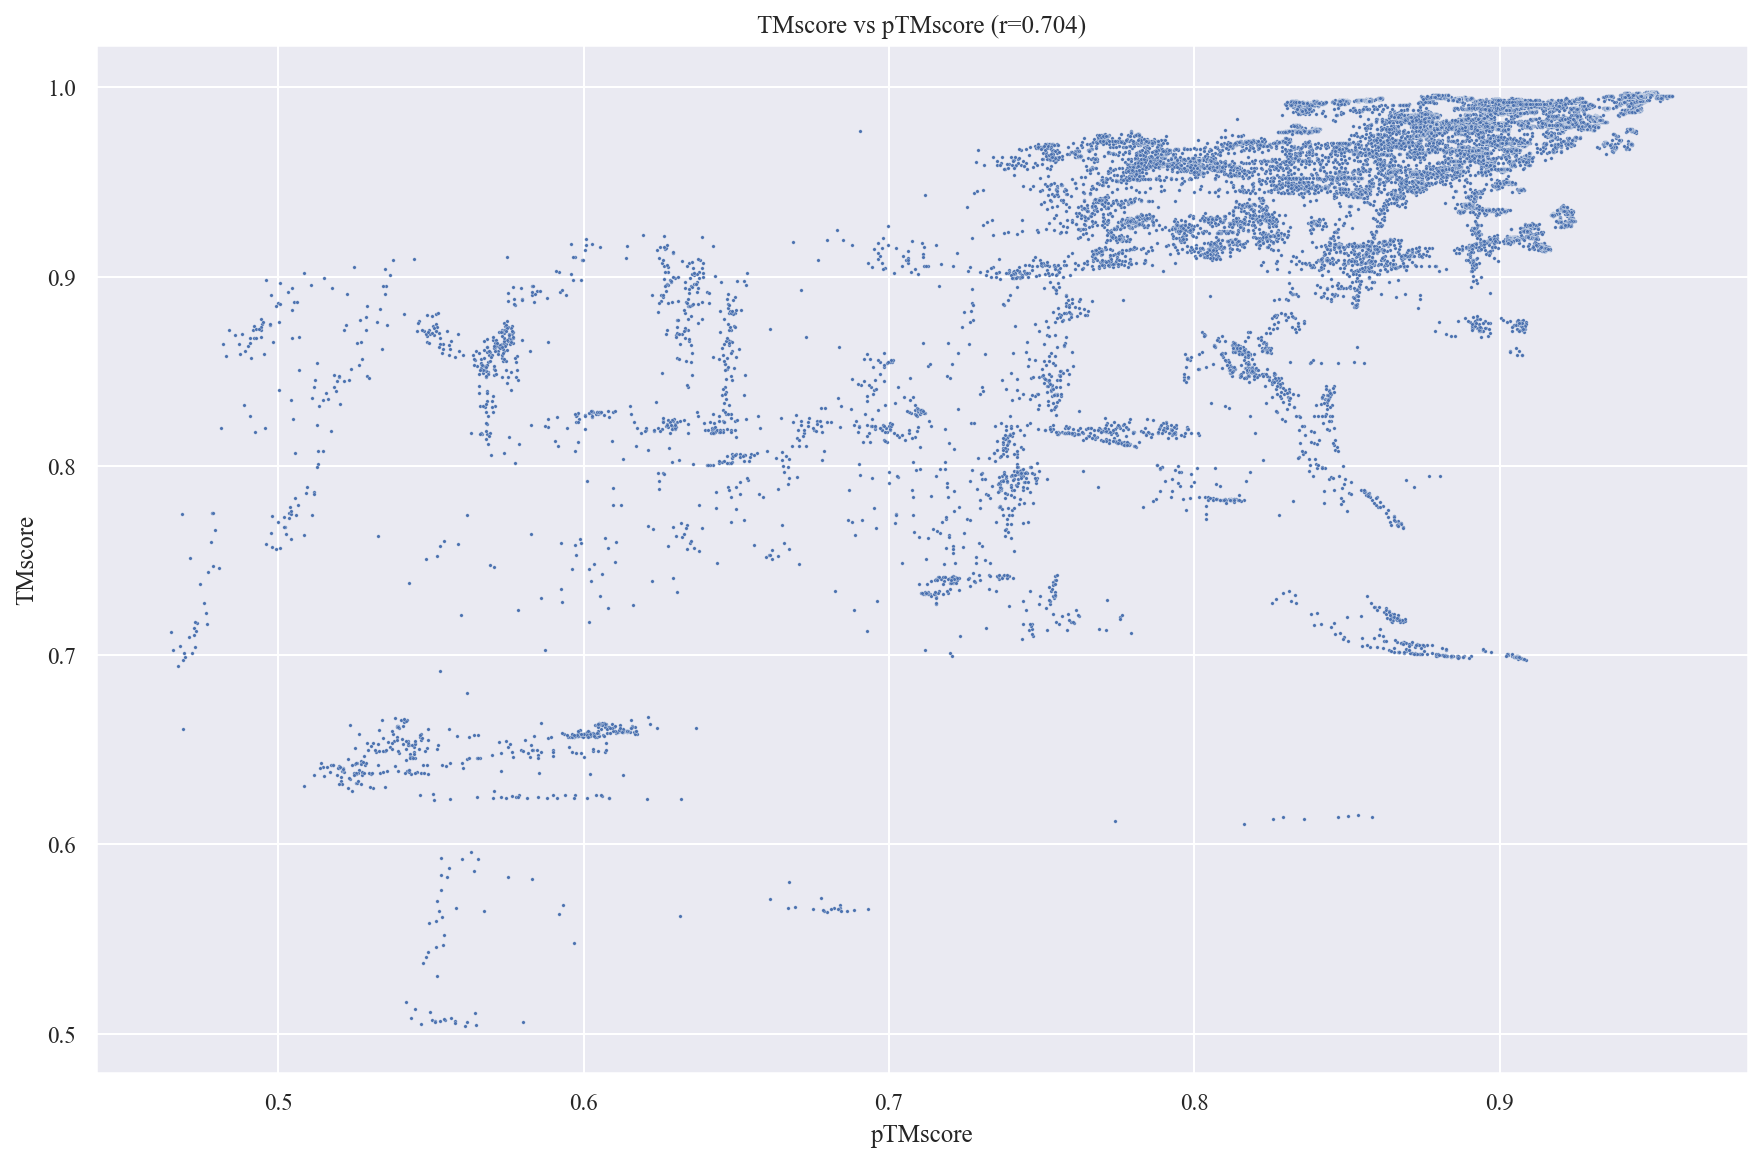

In [21]:
# pTMscore vs TMscore
label = 'TMscore'
score = 'pTMscore'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.title(f'{label} vs {score} (r={cc:.3f})')
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')

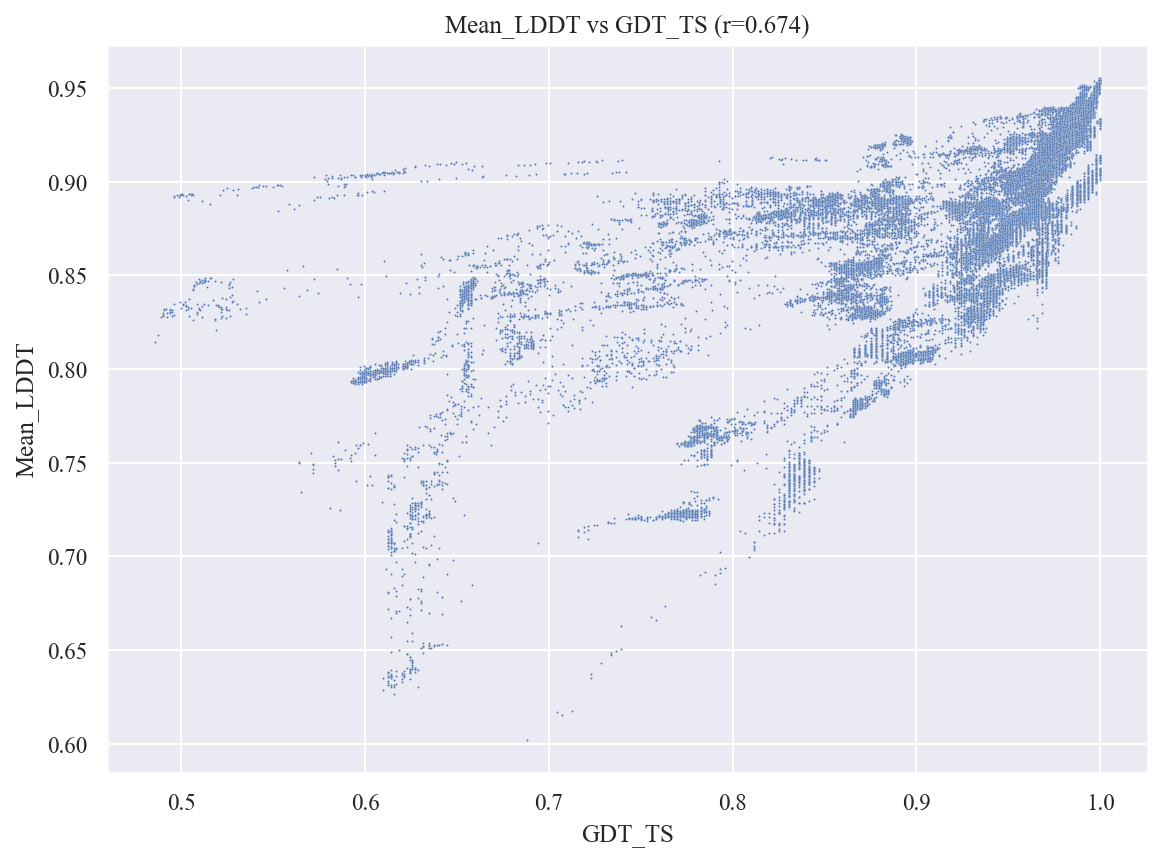

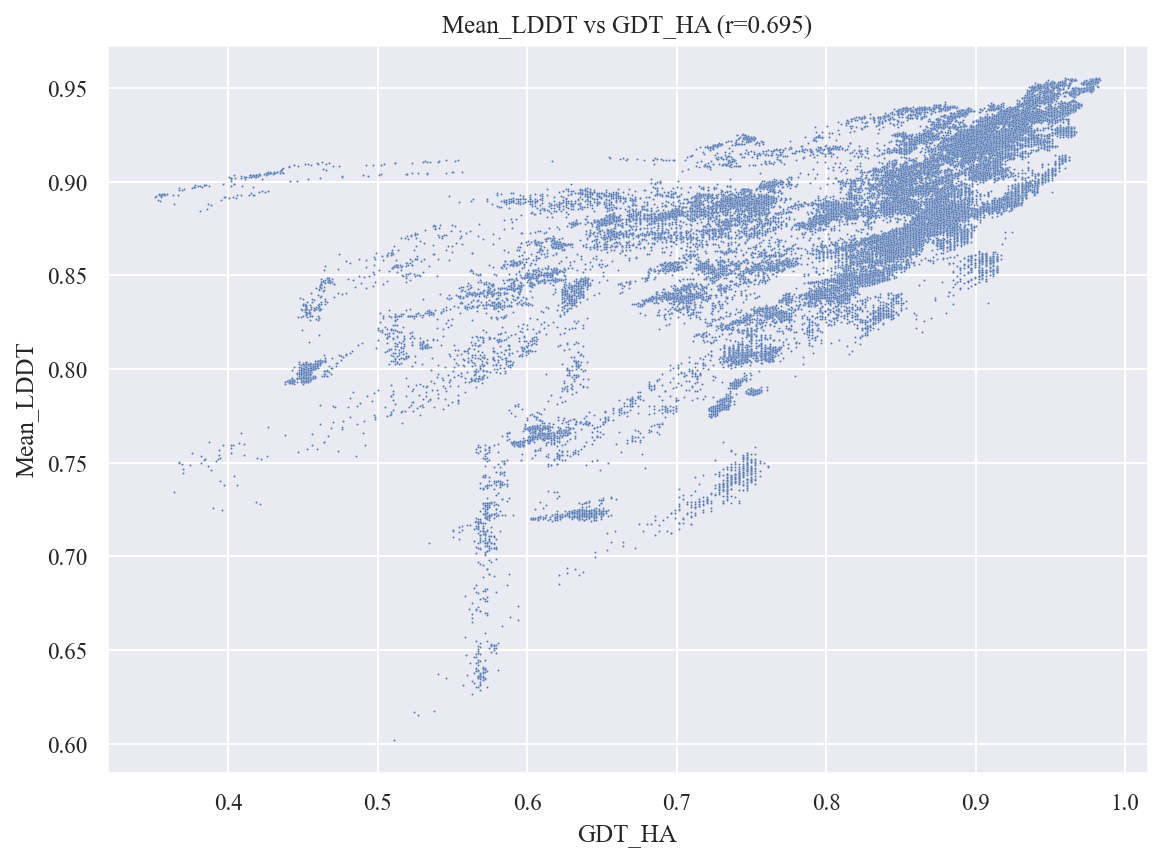

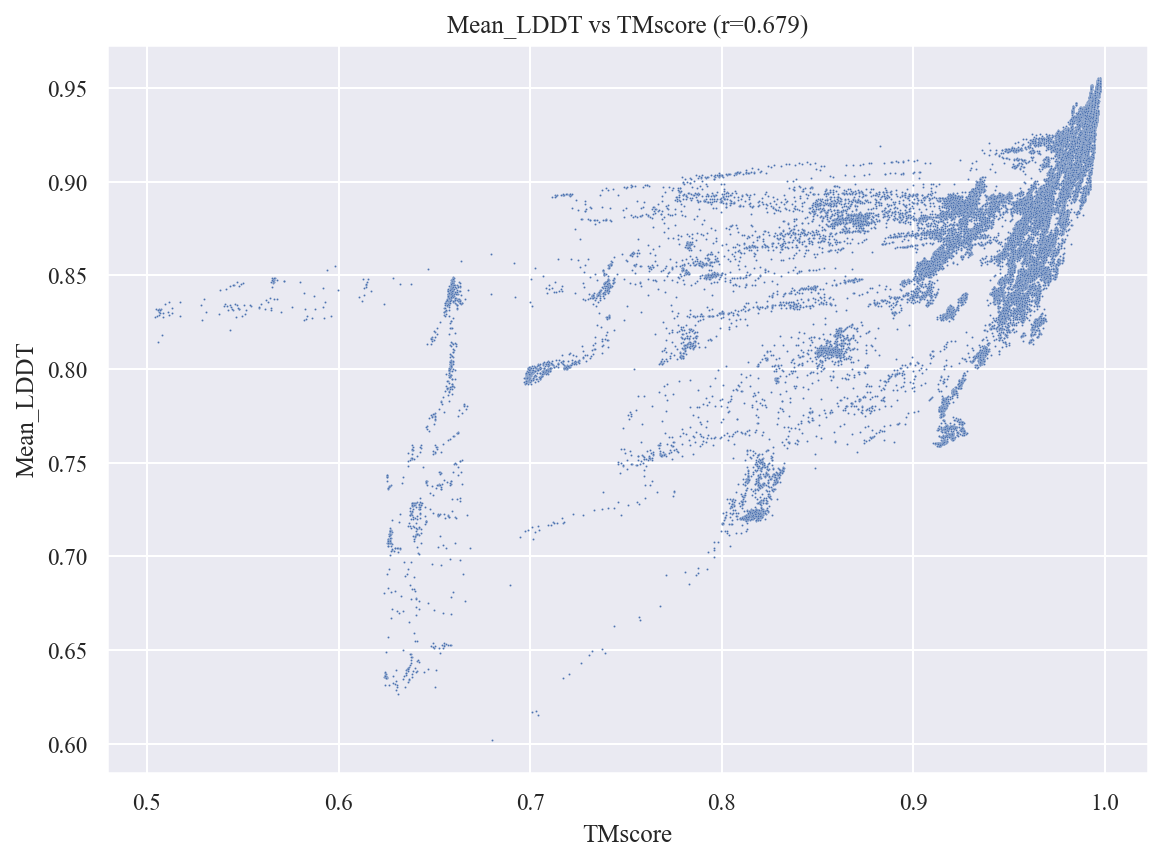

In [22]:
# Global score vs Mean local score
label = 'Mean_LDDT'
for label2 in ['GDT_TS', 'GDT_HA', 'TMscore']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=label2, y=label, s=1)
    cc = df.corr()[label][label2]
    plt.title(f'{label} vs {label2} (r={cc:.3f})')
    plt.tight_layout()
    plt.show()